In [46]:
cd Final_project

C:\Amherst\ASTR-337\Final_project


In [47]:
# The standard fare, plus a few extra packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os.path
import math
%matplotlib inline

# Newer packages:
# You may need to install them via pip
from astropy.stats import mad_std
from astropy.stats import sigma_clip
from photutils.utils import calc_total_error
import astropy.stats as stat

from photutils.aperture import aperture_photometry, ApertureStats, CircularAperture, CircularAnnulus
from photutils.detection import DAOStarFinder

from IPython.display import Image
import matplotlib.image as mpimg
from matplotlib.colors import LinearSegmentedColormap

In [48]:
m52_stars = pd.read_csv('M52_photometry.csv')
std_stars = pd.read_csv('std_star.csv')

In [4]:
m52_stars.head()

,Unnamed: 0,id,xcenter,ycenter,Bflux,Bfluxerr,Vflux,Vfluxerr,Rflux,Rfluxerr,...,Bmag,Bmag_err,Vmag,Vmag_err,Rmag,Rmag_err,B-V,B-V_err,V-R,V-R_err
0,0,1,2096.898043,48.102928,4885.697154,111.451081,14420.751378,138.056471,-118.649480,76.820409,...,13.501717,0.025361,11.491354,0.011771,NaN,0.702504,2.010363,0.027960,NaN,0.702602
1,1,2,1906.460422,79.839973,342.974691,82.812382,1491.973430,93.066841,2111.324904,101.785633,...,16.385878,0.262035,13.954421,0.067907,14.928233,0.052481,2.431457,0.270691,-0.973812,0.085823
2,2,3,3078.350570,91.936442,185.225228,84.542654,1606.736335,96.080731,887.105172,104.181234,...,17.054783,0.495259,13.873962,0.065117,15.869683,0.127493,3.180821,0.499522,-1.995721,0.143160
3,3,4,1839.516630,97.741082,1349.247866,92.685663,4810.918033,106.148731,4345.351604,113.144373,...,14.898804,0.074738,12.683254,0.024572,14.144558,0.028572,2.215550,0.078674,-1.461305,0.037685
4,4,5,3032.204856,114.080171,315.655484,86.187121,1541.156251,94.680079,1041.442133,100.095058,...,16.476000,0.296302,13.919207,0.066886,15.695533,0.104369,2.556793,0.303757,-1.776326,0.123962


In [5]:
std_stars.head()

,Unnamed: 0,id,xcenter,ycenter,Bflux,Bfluxerr,Vflux,Vfluxerr,Rflux,Rfluxerr,...,Rflux_1sec,Bflux_1sec_err,Vflux_1sec_err,Rflux_1sec_err,Binst,Vinst,Rinst,Binst_err,Vinst_err,Rinst_err
0,0,1,238.050013,13.202626,-177.636805,65.406448,1378.307201,94.017695,-177.636805,71.478844,...,-35.527361,13.081290,18.803539,14.295769,NaN,-6.100940,NaN,-0.399501,0.074010,-0.436591
1,1,2,844.610956,16.171182,-138.034704,67.085644,525.907262,88.638064,-138.034704,73.313938,...,-27.606941,13.417129,17.727613,14.662788,NaN,-5.054848,NaN,-0.527316,0.182869,-0.576273
2,2,3,1183.477247,15.965578,-142.060196,66.974222,266.021993,89.648065,-142.060196,73.192171,...,-28.412039,13.394844,17.929613,14.638434,NaN,-4.314869,NaN,-0.511523,0.365640,-0.559013
3,3,4,76.960295,18.005138,-91.761690,68.353401,1093.658574,101.671169,-91.761690,74.699395,...,-18.352338,13.670680,20.334234,14.939879,NaN,-5.849779,NaN,-0.808218,0.100866,-0.883254
4,4,5,323.266536,15.864044,-144.004805,66.920330,377.313751,91.759968,-144.004805,73.133276,...,-28.800961,13.384066,18.351994,14.626655,NaN,-4.694332,NaN,-0.504209,0.263864,-0.551021


C:\Users\jakia\AppData\Local\Temp\ipykernel_11216\1862252490.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  m52_stars_cut = (m52_stars[m52_stars['Vmag']<16])[m52_stars['V-R']>-3]


Text(0.5, 1.0, 'M52 Color-Magnitude Diagram')

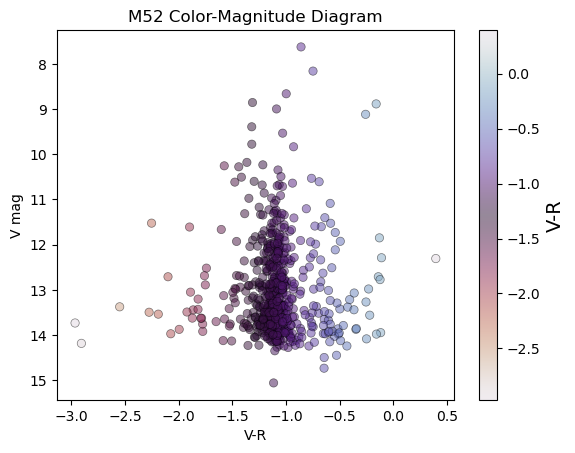

In [6]:
m52_stars_cut = (m52_stars[m52_stars['Vmag']<16])[m52_stars['V-R']>-3]
x = m52_stars_cut['V-R']
y = m52_stars_cut['Vmag']

pts = plt.scatter(x,y, alpha=0.5, edgecolors='black', linewidths = 0.5, c = x, cmap = 'twilight_r')

cb = plt.colorbar(pts)
cb.set_label('V-R', fontsize = 14)
plt.gca().invert_yaxis()
plt.xlabel('V-R')
plt.ylabel('V mag')
plt.title('M52 Color-Magnitude Diagram')

C:\Users\jakia\AppData\Local\Temp\ipykernel_11216\2226364761.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  m52_stars_cut = (m52_stars[m52_stars['Vmag']<16])[m52_stars['V-R']>-3]


Text(0.5, 1.0, 'M52 Color-Magnitude Diagram')

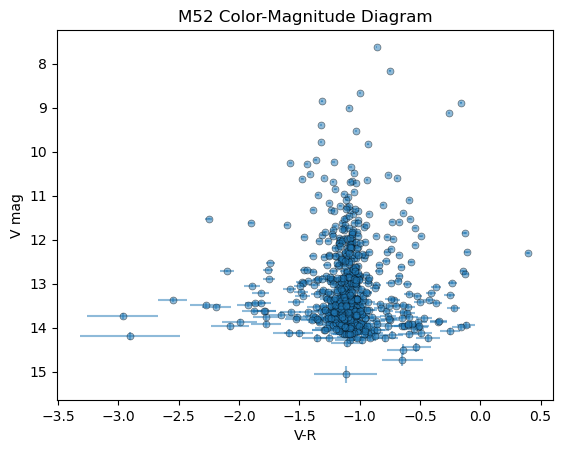

In [7]:
m52_stars_cut = (m52_stars[m52_stars['Vmag']<16])[m52_stars['V-R']>-3]
x = m52_stars_cut['V-R']
y = m52_stars_cut['Vmag']

plt.errorbar(x, y, xerr = m52_stars_cut["V-R_err"], yerr = m52_stars_cut["Vmag_err"], 
             marker = 'o', linestyle='None', alpha = 0.5, markeredgecolor = 'black',
             markeredgewidth = 0.5, markersize = 5)

cb = plt.colorbar(pts)
cb.set_label('V-R', fontsize = 14)

plt.gca().invert_yaxis()
plt.xlabel('V-R')
plt.ylabel('V mag')
plt.title('M52 Color-Magnitude Diagram')

C:\Users\jakia\AppData\Local\Temp\ipykernel_11216\911483340.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  m52_stars_cut = (m52_stars[m52_stars['Vmag'] < 16])[m52_stars['V-R'] > -3]


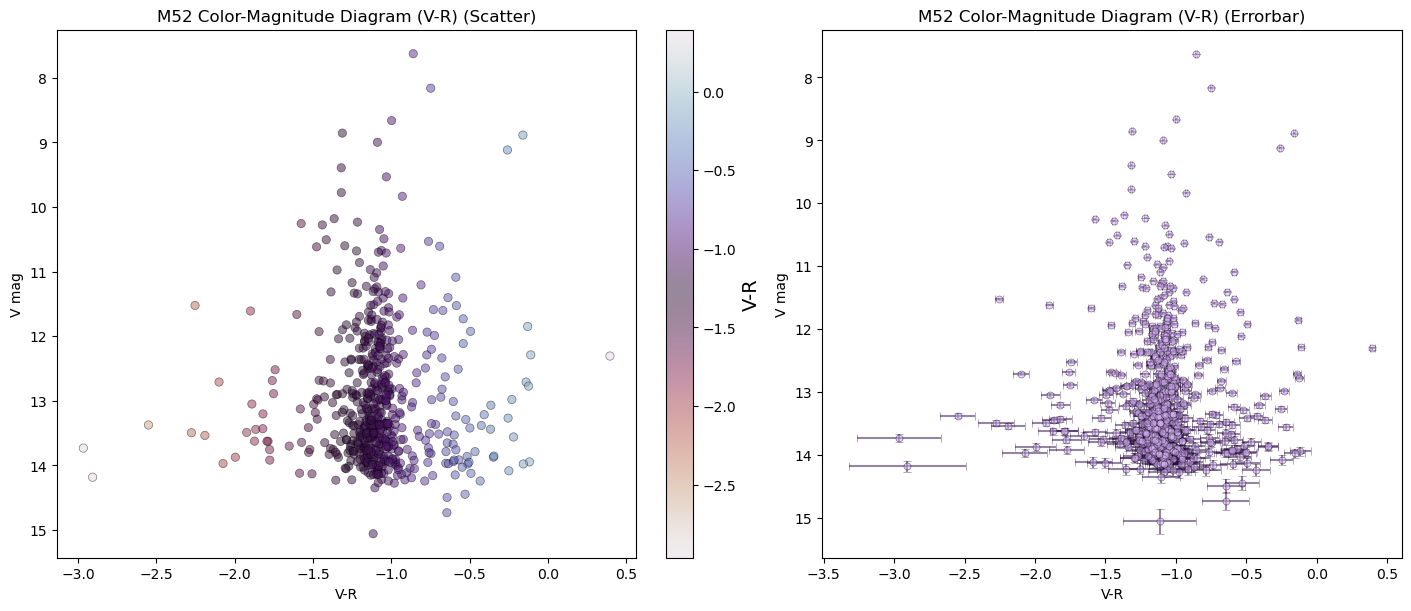

In [49]:
# Filter the data
m52_stars_cut = (m52_stars[m52_stars['Vmag'] < 16])[m52_stars['V-R'] > -3]
x = m52_stars_cut['V-R']
y = m52_stars_cut['Vmag']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

# Plot 1: Scatter Plot
pts = axs[0].scatter(x, y, alpha=0.5, edgecolors='black', linewidths=0.5, c=x, cmap='twilight_r')
cb1 = fig.colorbar(pts, ax=axs[0])
cb1.set_label('V-R', fontsize=14)
axs[0].invert_yaxis()
axs[0].set_xlabel('V-R')
axs[0].set_ylabel('V mag')
axs[0].set_title('M52 Color-Magnitude Diagram (V-R) (Scatter)')

# Plot 2: Errorbar Plot
axs[1].errorbar(x, y, xerr=m52_stars_cut["V-R_err"], yerr=m52_stars_cut["Vmag_err"], 
                marker='o', linestyle='None', alpha=0.5, markerfacecolor='#d9b2fb', markeredgecolor='black',
                markeredgewidth=0.5, markersize=5, ecolor='#2b0c46', capsize=3)
#cb2 = fig.colorbar(pts, ax=axs[1])
#cb2.set_label('V-R', fontsize=14)
axs[1].invert_yaxis()
axs[1].set_xlabel('V-R')
axs[1].set_ylabel('V mag')
axs[1].set_title('M52 Color-Magnitude Diagram (V-R) (Errorbar)')

# Display the plots
plt.show()

Text(0.5, 1.0, 'M52 Color-Magnitude Diagram')

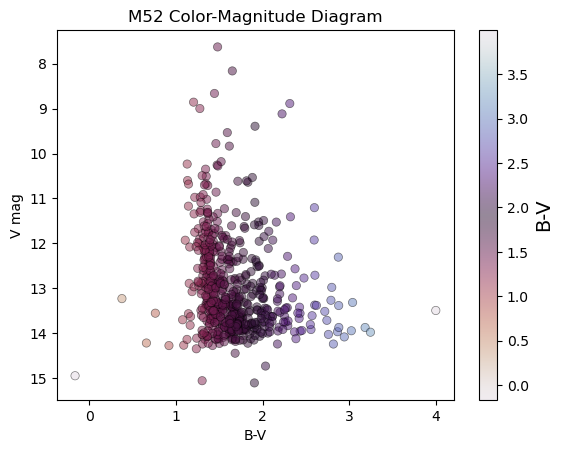

In [73]:
m52_stars_cut = m52_stars[m52_stars['Vmag']<16]
x = m52_stars_cut['B-V']
y = m52_stars_cut['Vmag']

pts = plt.scatter(x,y, alpha=0.5, edgecolors='black', linewidths = 0.5, c = x, cmap = 'twilight_r')

cb = plt.colorbar(pts)
cb.set_label('B-V', fontsize = 14)
plt.gca().invert_yaxis()
plt.xlabel('B-V')
plt.ylabel('V mag')
plt.title('M52 Color-Magnitude Diagram')

Text(0.5, 1.0, 'M52 Color-Magnitude Diagram')

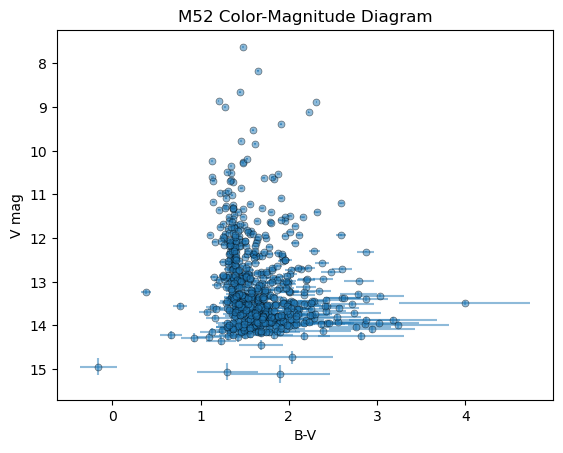

In [74]:
m52_stars_cut = m52_stars[m52_stars['Vmag']<16]
x = m52_stars_cut['B-V']
y = m52_stars_cut['Vmag']

plt.errorbar(x, y, xerr = m52_stars_cut["B-V_err"], yerr = m52_stars_cut["Vmag_err"], 
             marker = 'o', linestyle='None', alpha = 0.5, markeredgecolor = 'black',
             markeredgewidth = 0.5, markersize = 5)

cb = plt.colorbar(pts)
cb.set_label('B-V', fontsize = 14)

plt.gca().invert_yaxis()
plt.xlabel('B-V')
plt.ylabel('V mag')
plt.title('M52 Color-Magnitude Diagram')

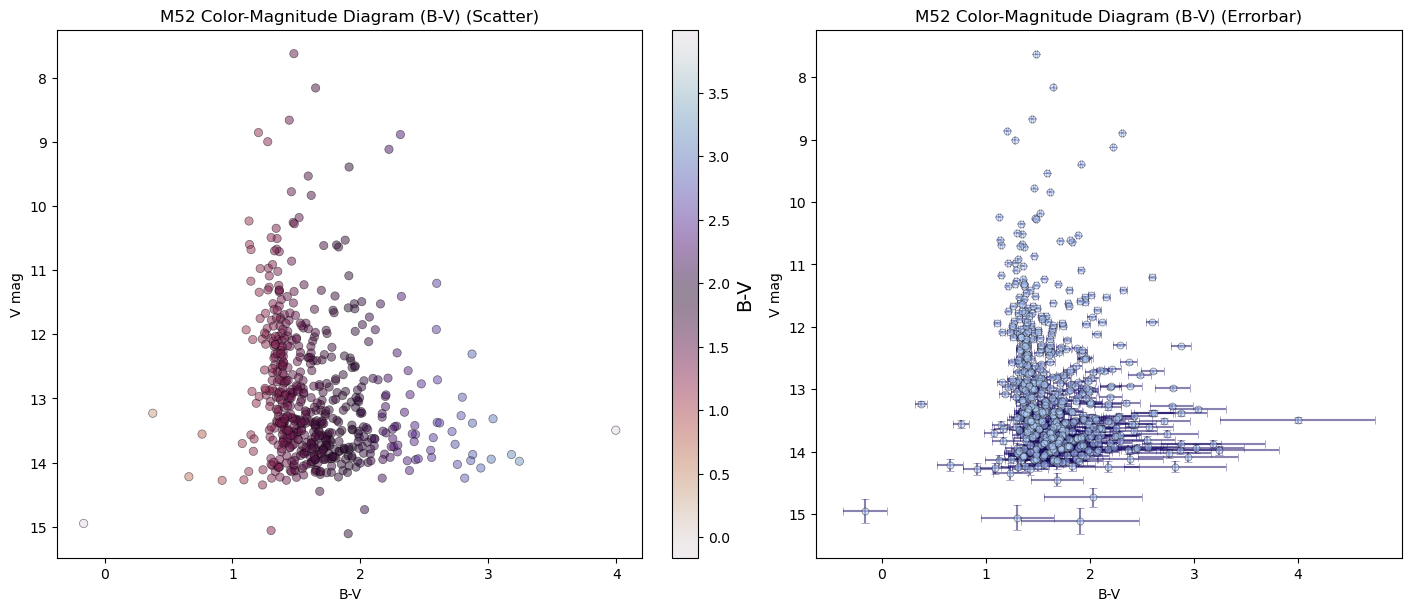

In [50]:
# Filter data
m52_stars_cut = m52_stars[m52_stars['Vmag'] < 16]
x = m52_stars_cut['B-V']
y = m52_stars_cut['Vmag']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

# Plot 1: Scatter Plot
pts = axs[0].scatter(x, y, alpha=0.5, edgecolors='black', linewidths=0.5, c=x, cmap='twilight_r')
cb1 = fig.colorbar(pts, ax=axs[0])
cb1.set_label('B-V', fontsize=14)
axs[0].invert_yaxis()
axs[0].set_xlabel('B-V')
axs[0].set_ylabel('V mag')
axs[0].set_title('M52 Color-Magnitude Diagram (B-V) (Scatter)')

# Plot 2: Errorbar Plot
axs[1].errorbar(
    x, y, 
    xerr=m52_stars_cut["B-V_err"], 
    yerr=m52_stars_cut["Vmag_err"], 
    marker='o', 
    linestyle='None', 
    alpha=0.5, 
    markeredgecolor='black', 
    markerfacecolor='#b7d5ff',  # Light blue markers
    markeredgewidth=0.5, 
    markersize=5, 
    ecolor='#150966',  # Deep navy blue error bars
    capsize=3  # Caps on the error bars
)

axs[1].invert_yaxis()
axs[1].set_xlabel('B-V')
axs[1].set_ylabel('V mag')
axs[1].set_title('M52 Color-Magnitude Diagram (B-V) (Errorbar)')

# Display the plots
plt.show()

In [77]:
iso3e7 = pd.read_table('Isochrones/isochrones_marigo08_3e7yr.txt', sep='\\s+', skiprows =10)
iso1e8 = pd.read_table('Isochrones/isochrones_marigo08_1e8yr.txt', sep='\\s+', skiprows =10)

Text(0.5, 1.0, 'M52 and 1e8 isochorne')

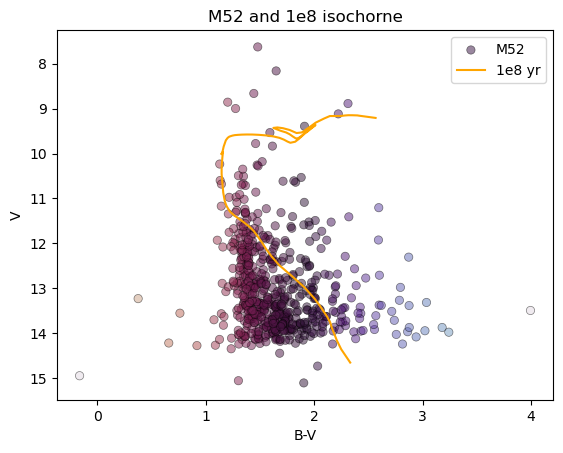

In [108]:
m52_stars_cut = m52_stars[m52_stars['Vmag']<16]
x = m52_stars_cut['B-V']
y = m52_stars_cut['Vmag']

# Replot, with just one isochrone, shifted to fit.
plt.scatter(x,y, label='M52', alpha=0.5, edgecolors='black', linewidths = 0.5, c = x, cmap = 'twilight_r')
cb = plt.colorbar(pts)
cb.set_label('B-V', fontsize = 14)

#plt.plot(iso3e7['B']-iso3e7['V']+1.5, iso3e7['V']/3+11, label='3e7 yr')
plt.plot(iso1e8['B']-iso1e8['V']+1.2, iso1e8['V']/3+10.7, label='1e8 yr', color = 'orange')

plt.legend()
plt.gca().invert_yaxis()
plt.xlabel('B-V')
plt.ylabel('V')
plt.title('M52 and 1e8 isochorne')

C:\Users\jakia\AppData\Local\Temp\ipykernel_2888\4003579979.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  m52_stars_cut = (m52_stars[m52_stars['Vmag']<16])[m52_stars['V-R']>-3]


Text(0.5, 1.0, 'M52 and 1e8 isochorne')

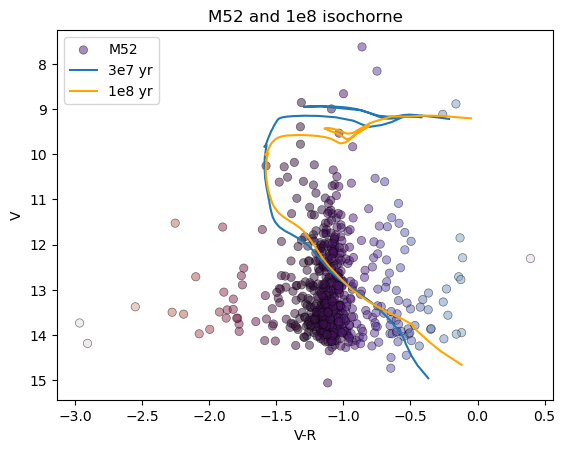

In [116]:
m52_stars_cut = (m52_stars[m52_stars['Vmag']<16])[m52_stars['V-R']>-3]
x = m52_stars_cut['V-R']
y = m52_stars_cut['Vmag']

# Replot, with just one isochrone, shifted to fit.
plt.scatter(x,y, label='M52', alpha=0.5, edgecolors='black', linewidths = 0.5, c = x, cmap = 'twilight_r')
cb = plt.colorbar(pts)
cb.set_label('V-R', fontsize = 14)

plt.plot(iso3e7['B']-iso3e7['V']-1.5, iso3e7['V']/3+11, label='3e7 yr')
plt.plot(iso1e8['V']-iso1e8['R']-1.5, iso1e8['V']/3+10.7, label='1e8 yr', color = 'orange')

plt.legend()
plt.gca().invert_yaxis()
plt.xlabel('V-R')
plt.ylabel('V')
plt.title('M52 and 1e8 isochorne')

In [59]:
folder_name = 'CSJ_10_26_24'
iso_path = os.path.join(folder_name, 'Isochrones/isochrones_marigo08_1e8yr.txt')
iso1e8 = pd.read_table(iso_path, sep='\\s+', skiprows =10)

C:\Users\jakia\AppData\Local\Temp\ipykernel_11216\611310224.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  m52_stars_cut = (m52_stars[m52_stars['Vmag'] < 16])[m52_stars['V-R'] > -3]


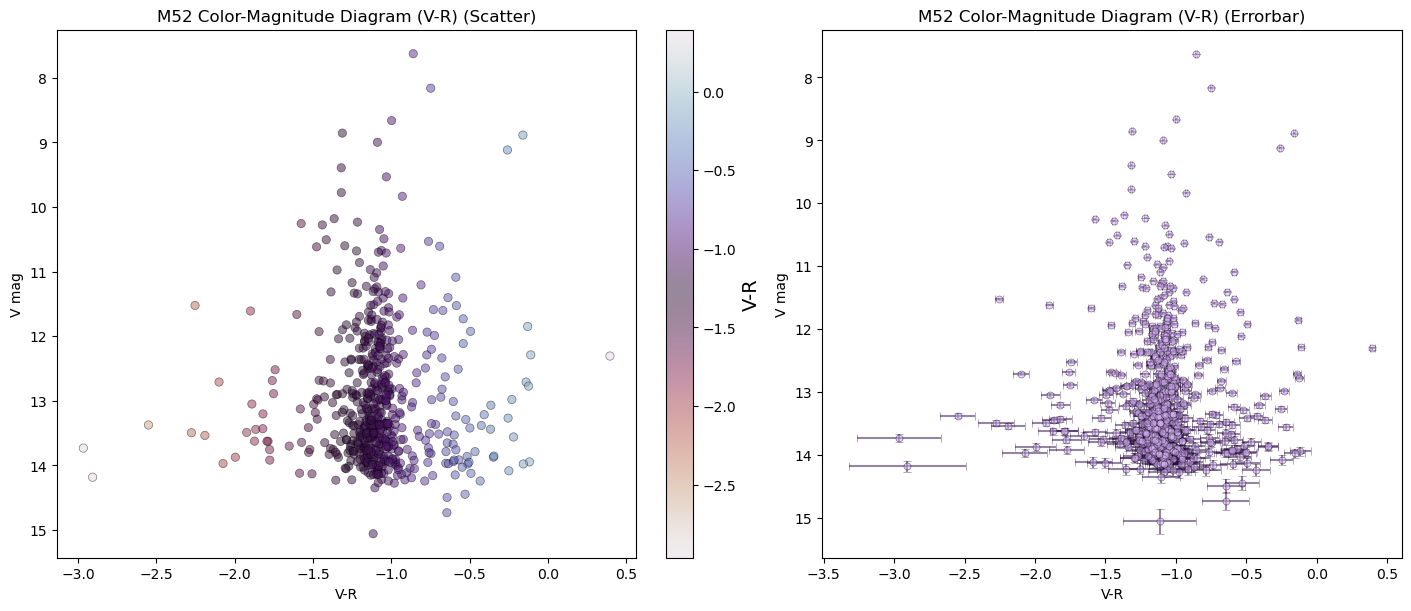

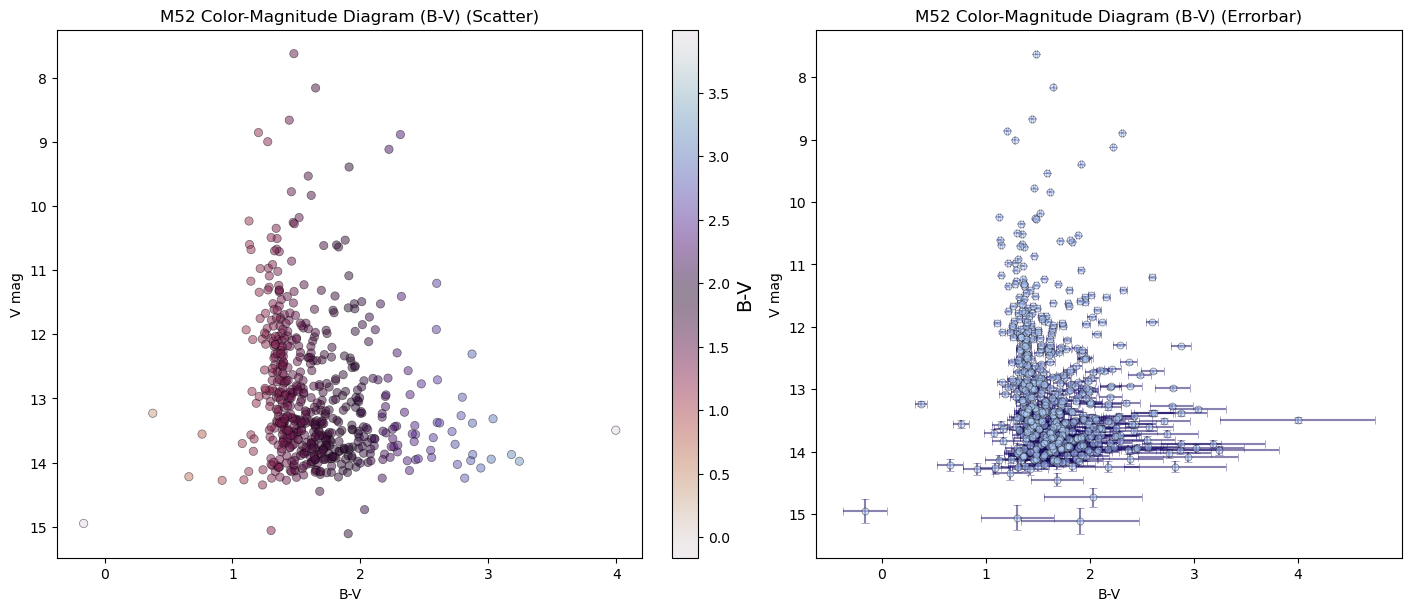

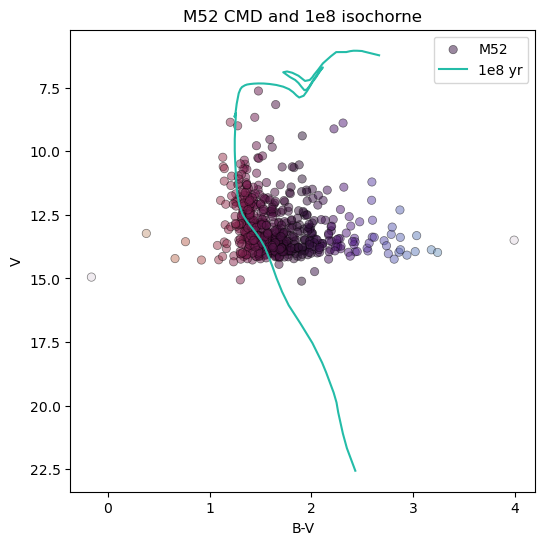

In [64]:
# Filter the data
m52_stars_cut = (m52_stars[m52_stars['Vmag'] < 16])[m52_stars['V-R'] > -3]
x = m52_stars_cut['V-R']
y = m52_stars_cut['Vmag']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

# Plot 1: Scatter Plot
pts = axs[0].scatter(x, y, alpha=0.5, edgecolors='black', linewidths=0.5, c=x, cmap='twilight_r')
cb1 = fig.colorbar(pts, ax=axs[0])
cb1.set_label('V-R', fontsize=14)
axs[0].invert_yaxis()
axs[0].set_xlabel('V-R')
axs[0].set_ylabel('V mag')
axs[0].set_title('M52 Color-Magnitude Diagram (V-R) (Scatter)')

# Plot 2: Errorbar Plot
axs[1].errorbar(x, y, xerr=m52_stars_cut["V-R_err"], yerr=m52_stars_cut["Vmag_err"], 
                marker='o', linestyle='None', alpha=0.5, markerfacecolor='#d9b2fb', markeredgecolor='black',
                markeredgewidth=0.5, markersize=5, ecolor='#2b0c46', capsize=3)
#cb2 = fig.colorbar(pts, ax=axs[1])
#cb2.set_label('V-R', fontsize=14)
axs[1].invert_yaxis()
axs[1].set_xlabel('V-R')
axs[1].set_ylabel('V mag')
axs[1].set_title('M52 Color-Magnitude Diagram (V-R) (Errorbar)')

# Display the plots
plt.show()

# Filter data
m52_stars_cut = m52_stars[m52_stars['Vmag'] < 16]
x = m52_stars_cut['B-V']
y = m52_stars_cut['Vmag']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

# Plot 1: Scatter Plot
pts = axs[0].scatter(x, y, alpha=0.5, edgecolors='black', linewidths=0.5, c=x, cmap='twilight_r')
cb1 = fig.colorbar(pts, ax=axs[0])
cb1.set_label('B-V', fontsize=14)
axs[0].invert_yaxis()
axs[0].set_xlabel('B-V')
axs[0].set_ylabel('V mag')
axs[0].set_title('M52 Color-Magnitude Diagram (B-V) (Scatter)')

# Plot 2: Errorbar Plot
axs[1].errorbar(
    x, y, 
    xerr=m52_stars_cut["B-V_err"], 
    yerr=m52_stars_cut["Vmag_err"], 
    marker='o', 
    linestyle='None', 
    alpha=0.5, 
    markeredgecolor='black', 
    markerfacecolor='#b7d5ff',  # Light blue markers
    markeredgewidth=0.5, 
    markersize=5, 
    ecolor='#150966',  # Deep navy blue error bars
    capsize=3  # Caps on the error bars
)

axs[1].invert_yaxis()
axs[1].set_xlabel('B-V')
axs[1].set_ylabel('V mag')
axs[1].set_title('M52 Color-Magnitude Diagram (B-V) (Errorbar)')

# Display the plots
plt.show()

#Replot, with just one isochrone, shifted to fit.

plt.figure(figsize=(6,6))
plt.scatter(x,y, label='M52', alpha=0.5, edgecolors='black', linewidths = 0.5, c = x, cmap = 'twilight_r')
cb = plt.colorbar(pts)
cb.set_label('B-V', fontsize = 14)

plt.plot(iso1e8['B']-iso1e8['V']+1.3, iso1e8['V']+10.7, label='1e8 yr', color = 'xkcd:tealish')

plt.legend()
plt.gca().invert_yaxis()
plt.xlabel('B-V')
plt.ylabel('V')
plt.title('M52 CMD and 1e8 isochorne')
plt.show()

In [67]:
#chi^2 calculation for isochrone
iso1e8_shift_cut = iso1e8[iso1e8['V']>1.5]   # getting just the part of the isochrone that's on the main sequence
iso1e8_shift_cut = iso1e8_shift_cut.assign(B_V = iso1e8_shift_cut['B']-iso1e8_shift_cut['V'])
iso1e8_shift_cut['B_V'] = iso1e8_shift_cut['B_V'] + 1.3

chi_sqfit = ((y - iso1e8_shift_cut['V'])/m52_stars_cut['Vmag_err'])**2
chi_sqfit = np.sum(chi_sqfit)
print('$\chi^{2}$ for 1e8 MS is', chi_sqfit)

# Distance calculation
# we shifted the function by +10.7 in the Vmag direction 
d = 10**((10.7 + 5)/5)
print('The distance to M52 is', d)
print('Actual value is 1533')
percent_err = (d - 1533)/1533 * 100
print("Percent error in distance", percent_err, '%')

$\chi^{2}$ for 1e8 MS is 4054426.655484408
The distance to M52 is 1380.3842646028838
Actual value is 1533
Percent error in distance -9.955364344234583 %


<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
C:\Users\jakia\AppData\Local\Temp\ipykernel_11216\2670372407.py:8: SyntaxWarning: invalid escape sequence '\c'
  print('$\chi^{2}$ for 1e8 MS is', chi_sqfit)
